# LINEAR REGRESSION
## Exploring data
Data: Medical charges data from Kaggle: https://www.kaggle.com/mirichoi0218/insurance

In [86]:
# import necessary libraries

import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

path = 'C:/Users/Katia/Documents/Applied Data Analytics - course/Kaggle_medical_cost'
os.chdir(path)

In [87]:
# read csv data 

# Check README for where you can find the data
df = pd.read_csv('insurance.csv')

In [88]:
# Check variables
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [89]:
# Check descriptive statistics of continuous variables
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Descriptive statistics show that insurance charges vary greatly from person to person, with an sdt value almost as high as the mean. We have to watch for outliers.

In [90]:
# Check if there are any missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

No missing values. There is no need to fill missing data with means or dummy variables.

### Explore continuous variables

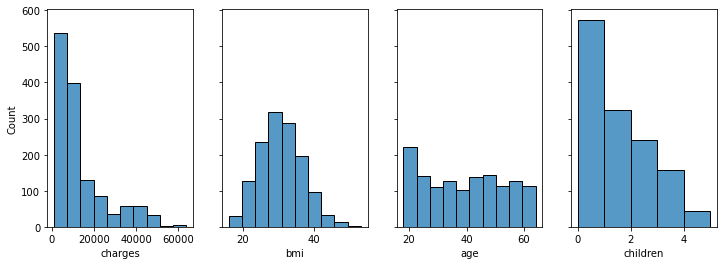

In [91]:
# Histogram

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize = (12,4))

sns.histplot(df['charges'], bins =10, ax = ax1)
sns.histplot(df['bmi'], bins =10, ax = ax2)
sns.histplot(df['age'], bins =10, ax = ax3)
sns.histplot(df['children'], bins =5, ax = ax4)

Insurance charges are skewed, as well as number of children. The range of ages is roughly even, and bmi seems normally distributed. Let's look at the relationship between the outcome variable (i.e., charges) and the other continuous variables.

C:\Users\katia\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\katia\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\katia\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


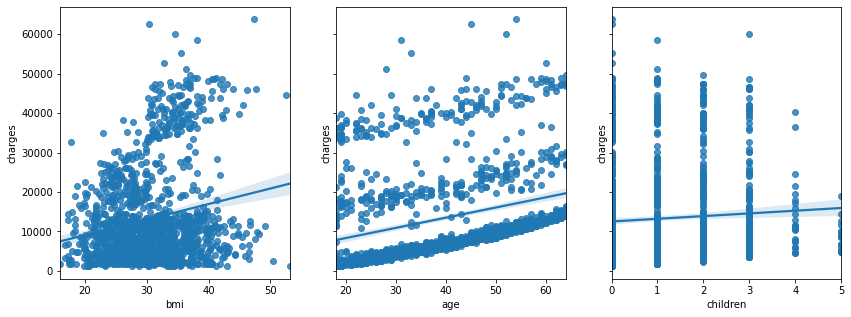

In [92]:
# Scatter plots

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize = (14,5))

sns.regplot(df['bmi'], df['charges'], ax = ax1)
sns.regplot(df['age'], df['charges'], ax = ax2)
sns.regplot(df['children'], df['charges'], ax = ax3)

# use sns.scatterplot() if the line of best fit is not needed

All relationships seem positive, but not very strong. Correlations coefficients show how strong the relationships are.

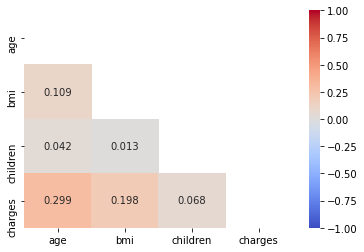

In [93]:
# Generate correlation matrix heat map
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True, fmt='.3f', vmin=-1, 
            vmax=1, center= 0, cmap='coolwarm', mask=matrix)

Age has a borderline medium correlation with charges. All other variables have low correlations.

### Explore categorical variables

Boxplots afford an exploration of how the data is distributed, the presence of outlier, and differences accross groups

C:\Users\katia\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


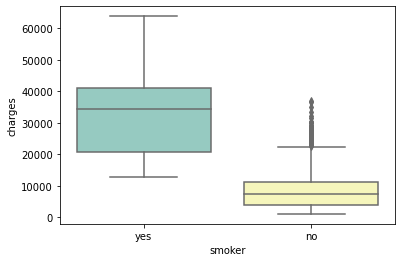

In [94]:
# Boxplot

sns.boxplot(df['smoker'], df['charges'], palette="Set3") #palette set3 reduce transparency

C:\Users\katia\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


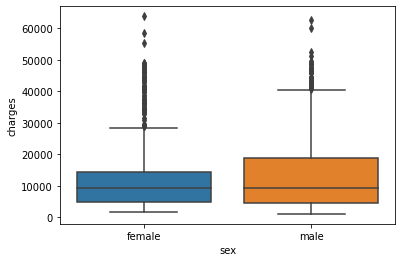

In [95]:
sns.boxplot(df['sex'], df['charges']) 

C:\Users\katia\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


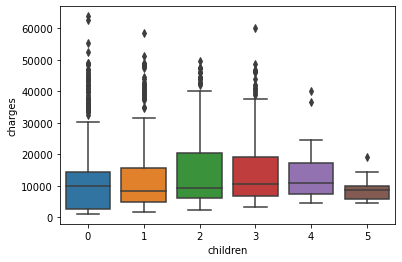

In [96]:
# For the sake of exploring the data, children can be treated as categorical
sns.boxplot(df['children'], df['charges'])

C:\Users\katia\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


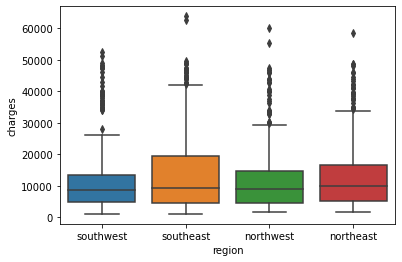

In [97]:
sns.boxplot(df['region'], df['charges'])

There seems to be a significant effect of smoker status. It seems that there are no significant differences between male and female groups and regions. Although there doesn't seem to be an effect of number of children, the plot follows an insteresting curve, with costs increasing for people with up to 3 children and dropping after that. Note, though, that number of smokers decrease with more children, suggesting that this effect might not be related to number of children.

C:\Users\katia\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


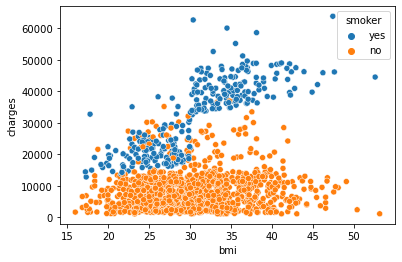

In [98]:
# Scatterplot discriminating groups

sns.scatterplot(df['bmi'], df['charges'], hue= df['smoker'])

C:\Users\katia\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


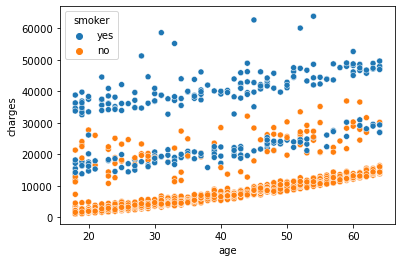

In [99]:
# Scatterplot discriminating groups

sns.scatterplot(df['age'], df['charges'], hue= df['smoker'])

C:\Users\katia\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


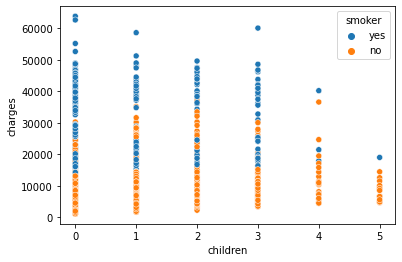

In [100]:
sns.scatterplot(df['children'], df['charges'], hue= df['smoker'])

The effect of bmi seems to be due to smoker status. The trend upward for age is more consistent among non-smokers. It may be worth checking for interactions between smoker status and age, as well as smoker status and bmi down the machine learning pipeline.

## Feature engineering

We may want to explore a few new variables: a variable discriminating those with or without children, a dichotomous variable discriminating those with up to 3 and more than 3 children, and a categorical variable for age groups.

In [101]:
df.groupby('children').count()

,age,sex,bmi,smoker,region,charges
children,,,,,,
0,574,574,574,574,574,574
1,324,324,324,324,324,324
2,240,240,240,240,240,240
3,157,157,157,157,157,157
4,25,25,25,25,25,25
5,18,18,18,18,18,18


The number of people with 4 children and fewer is very low to warrant any reliable analysis; however, there seems to be enough people without children to create a dichotomous variable discriminating those with and without children.

In [102]:
# Generate dichotomous children_status variable
children_status = []
for row in df['children']:
    if row == 0:
        children_status.append('no')
    else:
        children_status.append('yes')
df['children_status'] = children_status

In [103]:
# Generate age_group variable
age_groups = []
for age in df['age']:
    if age <= 30:
        age_groups.append('twenties_less')
    if age > 30 and age <= 40:
        age_groups.append('thirties')
    if age > 40 and age <= 50:
        age_groups.append('fourties')
    if age > 50:
        age_groups.append('fifties_more')
df['age_groups'] = age_groups

Let's check whether the new variables seem to show stronger trends.

C:\Users\katia\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


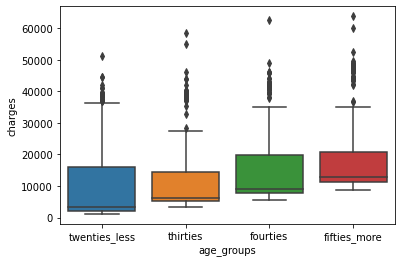

In [104]:
sns.boxplot(df['age_groups'], df['charges'])

C:\Users\katia\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


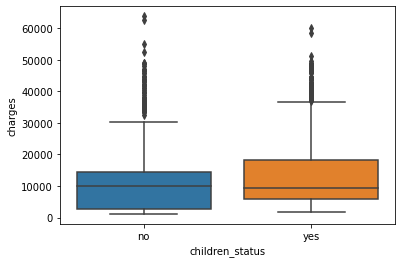

In [105]:
sns.boxplot(df['children_status'], df['charges'])

The new features may not be more powerful predictors than original features, as suggested by boxplots.

## Removing outliers

Check for outliers in the 95th quantile, 3 sds above the mean, and in the 99th quantile

In [106]:
# Define outlier function checking for outliers in the 95th quantile, 3 sds above the mean, and in the 99th quantile
def outlier(feature):
    outliers = []
    data = df[feature]
    mean = np.mean(data)
    std =np.std(data)
    
    for value in data:
        z_score= (value - mean)/std 
        if np.abs(z_score) > 3:
            outliers.append(value)
    print('\nOutlier caps for {}:'.format(feature))
    print('  --95p: {:.1f} / {} values exceed that'.format(data.quantile(.95),
                                                             len([i for i in data
                                                                  if i > data.quantile(.95)])))
    print('  --3sd: {:.1f} / {} values exceed that'.format(mean + 3*(std), len(outliers)))
    print('  --99p: {:.1f} / {} values exceed that'.format(data.quantile(.99),
                                                           len([i for i in data
                                                                if i > data.quantile(.99)])))
    
# function from https://www.linkedin.com/learning/applied-machine-learning-feature-engineering

In [107]:
for variable in ['charges', 'age','bmi', 'children']:
    outlier(variable)


Outlier caps for charges:
  --95p: 41181.8 / 67 values exceed that
  --3sd: 49586.9 / 7 values exceed that
  --99p: 48537.5 / 14 values exceed that

Outlier caps for age:
  --95p: 62.0 / 45 values exceed that
  --3sd: 81.3 / 0 values exceed that
  --99p: 64.0 / 0 values exceed that

Outlier caps for bmi:
  --95p: 41.1 / 67 values exceed that
  --3sd: 49.0 / 4 values exceed that
  --99p: 46.4 / 14 values exceed that

Outlier caps for children:
  --95p: 3.0 / 43 values exceed that
  --3sd: 4.7 / 18 values exceed that
  --99p: 5.0 / 0 values exceed that


In [108]:
# Remove outliers based on 99 quantile

df['charges_clean']= df['charges'].clip(upper=df['charges'].quantile(.99))
df['bmi_clean'] = df['bmi'].clip(upper=df['bmi'].quantile(.99))

In [109]:
df.describe()

,age,bmi,children,charges,charges_clean,bmi_clean
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,13220.715550,30.643352
std,14.049960,6.098187,1.205493,12110.011237,11941.304323,6.039053
min,18.000000,15.960000,0.000000,1121.873900,1121.873900,15.960000
25%,27.000000,26.296250,0.000000,4740.287150,4740.287150,26.296250
50%,39.000000,30.400000,1.000000,9382.033000,9382.033000,30.400000
75%,51.000000,34.693750,2.000000,16639.912515,16639.912515,34.693750
max,64.000000,53.130000,5.000000,63770.428010,48537.480726,46.407900


## Transform skewed variables

As suggested by the histograms, insurance charges and number of children as skewed variables

In [110]:
import scipy.stats
from statsmodels.graphics.gofplots import qqplot

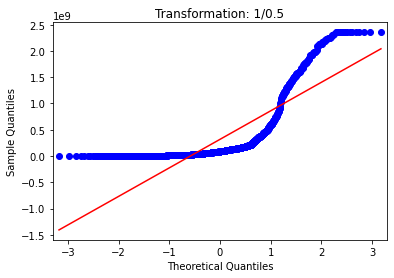

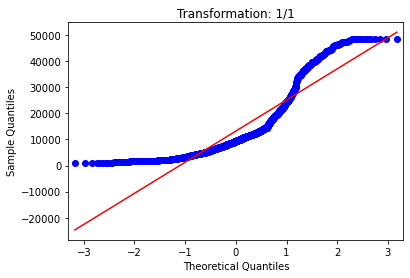

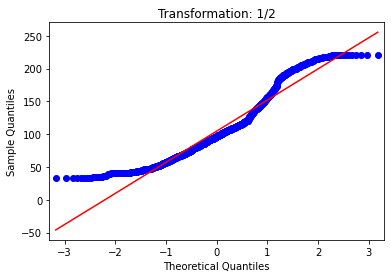

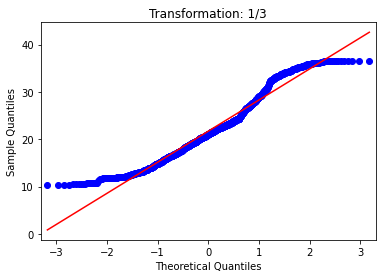

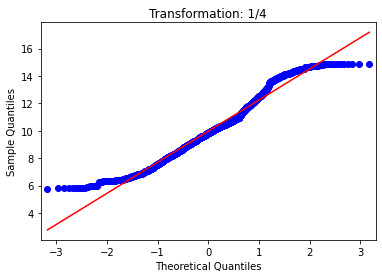

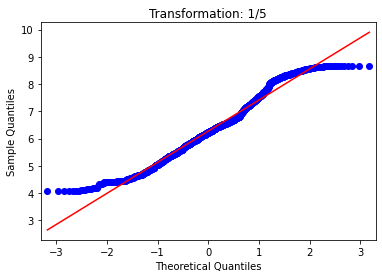

In [111]:
# Generate QQ plots to select best transformation
for i in [0.5, 1, 2, 3, 4, 5]:
    data = df['charges_clean']**(1/i)
    qqplot(data, line='s')
    plt.title("Transformation: 1/{}".format(str(i)))

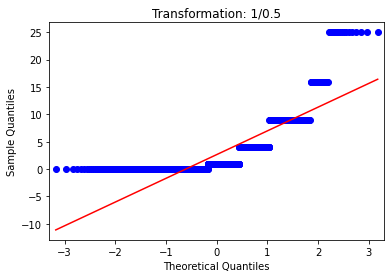

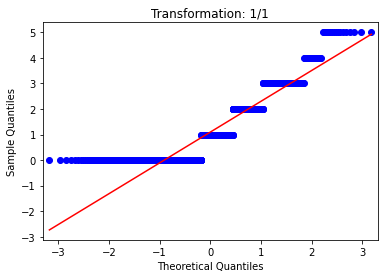

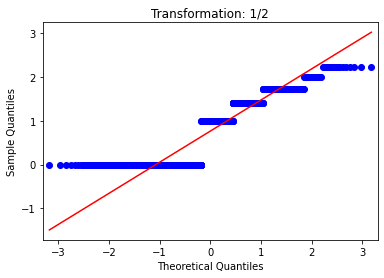

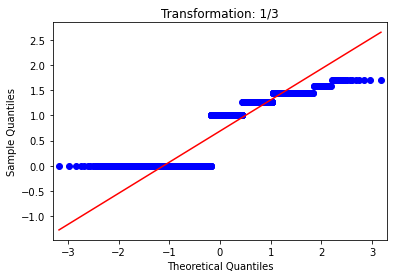

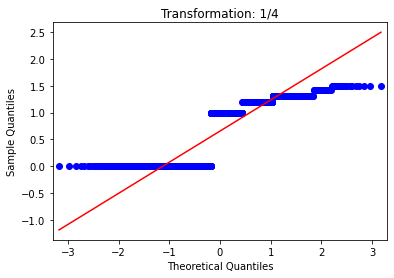

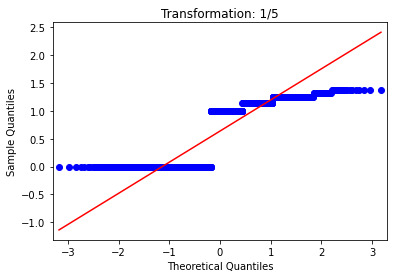

In [112]:
# Generate QQ plots to select best transformation
for i in [0.5, 1, 2, 3, 4, 5]:
    data = df['children']**(1/i)
    qqplot(data, line='s')
    plt.title("Transformation: 1/{}".format(str(i)))

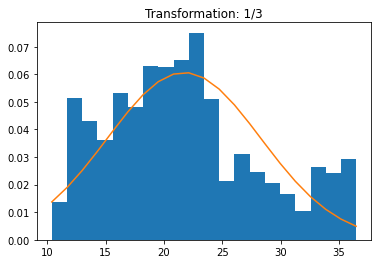

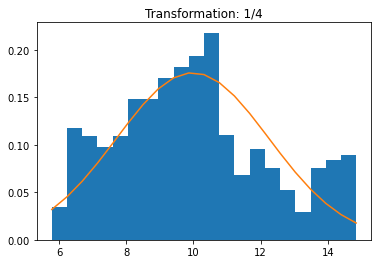

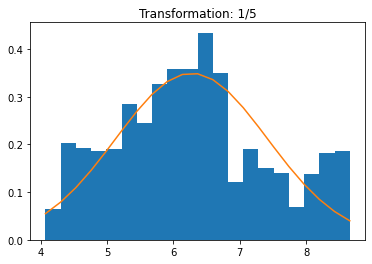

In [113]:
# Box-Cox transformation
for i in [3, 4, 5]:
    data = df['charges_clean']**(1/i)
    n, bins, patches = plt.hist(data, 20, density=True)
    mu = np.mean(data)
    sigma = np.std(data)
    plt.plot(bins, scipy.stats.norm.pdf(bins, mu, sigma))
    plt.title("Transformation: 1/{}".format(str(i)))
    plt.show()

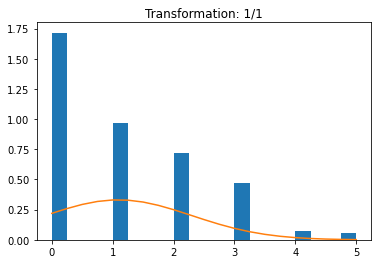

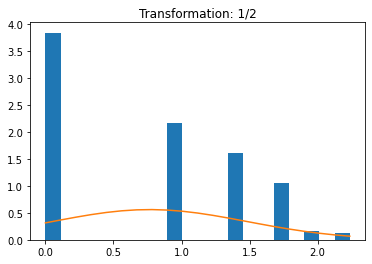

In [114]:
for i in [1,2]:
    data = df['children']**(1/i)
    n, bins, patches = plt.hist(data, 20, density=True)
    mu = np.mean(data)
    sigma = np.std(data)
    plt.plot(bins, scipy.stats.norm.pdf(bins, mu, sigma))
    plt.title("Transformation: 1/{}".format(str(i)))
    plt.show()

Transformation 1/3 to 1/5 seem to generate similar distributions for charges, and transformation 1/2 seems the best for children. Let's save transformation 1/5 and 1/2

In [115]:
# Create the new transformed variable
df['charges_clean_trans'] = df['charges_clean'].apply(lambda x: x**(1/5))
df['children_trans'] = df['children'].apply(lambda x: x**(1/2))
df.head()

,age,sex,bmi,children,smoker,region,charges,children_status,age_groups,charges_clean,bmi_clean,charges_clean_trans,children_trans
0,19,female,27.900,0,yes,southwest,16884.92400,no,twenties_less,16884.92400,27.900,7.006479,0.000000
1,18,male,33.770,1,no,southeast,1725.55230,yes,twenties_less,1725.55230,33.770,4.440027,1.000000
2,28,male,33.000,3,no,southeast,4449.46200,yes,twenties_less,4449.46200,33.000,5.366134,1.732051
3,33,male,22.705,0,no,northwest,21984.47061,no,thirties,21984.47061,22.705,7.386236,0.000000
4,32,male,28.880,0,no,northwest,3866.85520,no,thirties,3866.85520,28.880,5.217610,0.000000


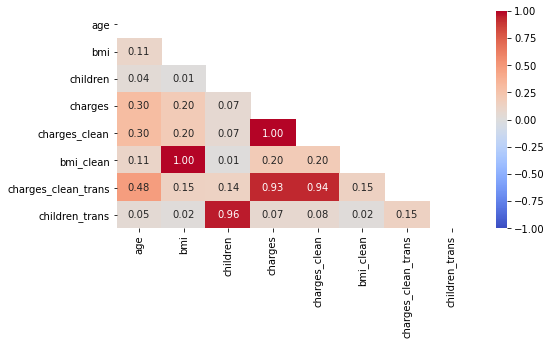

In [116]:
fig = plt.figure(figsize=(8,4))

# Generate correlation matrix heat map
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True, fmt='.2f', vmin=-1, 
            vmax=1, center= 0, cmap='coolwarm', mask=matrix)

Overall, the new transformed variables have higher correlations with other variables 

## Categorical variables into numeric

For the development of statistical models, the categorical variables need to be encoded.

In [117]:
from sklearn.preprocessing import LabelEncoder

for variable in ['smoker', 'sex', 'age_groups', 'children_status', 'region']:
    le = LabelEncoder()
    df[variable + "_encoded"] = le.fit_transform(df[variable].astype(str))
    
df.head()

,age,sex,bmi,children,smoker,region,charges,children_status,age_groups,charges_clean,bmi_clean,charges_clean_trans,children_trans,smoker_encoded,sex_encoded,age_groups_encoded,children_status_encoded,region_encoded
0,19,female,27.900,0,yes,southwest,16884.92400,no,twenties_less,16884.92400,27.900,7.006479,0.000000,1,0,3,0,3
1,18,male,33.770,1,no,southeast,1725.55230,yes,twenties_less,1725.55230,33.770,4.440027,1.000000,0,1,3,1,2
2,28,male,33.000,3,no,southeast,4449.46200,yes,twenties_less,4449.46200,33.000,5.366134,1.732051,0,1,3,1,2
3,33,male,22.705,0,no,northwest,21984.47061,no,thirties,21984.47061,22.705,7.386236,0.000000,0,1,2,0,1
4,32,male,28.880,0,no,northwest,3866.85520,no,thirties,3866.85520,28.880,5.217610,0.000000,0,1,2,0,1


## Create training and test sets

The dataset will be split to train, test, and validate the statistical models (60-20-20)

In [118]:
from sklearn.model_selection import train_test_split

df_nostr = df.drop(['sex', 'smoker', 'region', 'age_groups', 'children_status', 'children'], axis =1)
labels = df['charges_clean_trans']

X_train, X_test, y_train, y_test = train_test_split(df_nostr, labels, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

X_train.head()

,age,bmi,charges,charges_clean,bmi_clean,charges_clean_trans,children_trans,smoker_encoded,sex_encoded,age_groups_encoded,children_status_encoded,region_encoded
25,59,27.72,14001.1338,14001.1338,27.72,6.748895,1.732051,0,0,0,1,2
336,60,25.74,12142.5786,12142.5786,25.74,6.559371,0.000000,0,1,0,0,2
47,28,34.77,3556.9223,3556.9223,34.77,5.131152,0.000000,0,0,3,0,1
106,19,28.40,2331.5190,2331.5190,28.40,4.715500,1.000000,0,0,3,1,3
1269,45,27.50,8615.3000,8615.3000,27.50,6.124267,1.732051,0,1,1,1,3


In [119]:
# Check if datasets are devided as desired
for dataset in [y_train, y_val, y_test]:
    print(round(len(dataset) / len(labels), 2))

0.6
0.2
0.2


## Standardize variables

In [120]:
from sklearn.preprocessing import StandardScaler

# Fit the scaler on the training data
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [121]:
# Scale the training, test, and validation sets
variables = X_train.columns

X_train[variables] = scaler.transform(X_train[variables])
X_val[variables] = scaler.transform(X_val[variables])
X_test[variables] = scaler.transform(X_test[variables])

X_train.head()

C:\Users\katia\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\katia\Anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,age,bmi,charges,charges_clean,bmi_clean,charges_clean_trans,children_trans,smoker_encoded,sex_encoded,age_groups_encoded,children_status_encoded,region_encoded
25,1.388736,-0.453257,0.058453,0.064819,-0.454341,0.411845,1.353817,-0.514766,-1.017611,-1.309433,0.857864,0.481735
336,1.459036,-0.785388,-0.096001,-0.092404,-0.789341,0.244641,-1.086761,-0.514766,0.982693,-1.309433,-1.165686,0.481735
47,-0.790570,0.729328,-0.809505,-0.818701,0.738461,-1.015377,-1.086761,-0.514766,-1.017611,1.173227,-1.165686,-0.416757
106,-1.423272,-0.339192,-0.911341,-0.922363,-0.339291,-1.382077,0.322307,-0.514766,-1.017611,1.173227,0.857864,1.380226
1269,0.404533,-0.490161,-0.389132,-0.390792,-0.491563,-0.139221,1.353817,-0.514766,0.982693,-0.481880,0.857864,1.380226


## Separate original, cleaned, all, and reduced variables

In [122]:
df_original = ['age', 'sex_encoded', 'bmi', 'children_trans', 'smoker_encoded', 'region_encoded']
df_cleaned = ['age', 'sex_encoded', 'bmi_clean', 'children_trans', 'smoker_encoded','region_encoded']
df_complex = ['age', 'sex_encoded', 'bmi_clean', 'children_trans', 'smoker_encoded',
                'region_encoded', 'children_status_encoded', 'age_groups_encoded']
# The variables which seem to have higher impact
df_reduced = ['age', 'bmi_clean', 'children_trans', 'smoker_encoded', 'region_encoded']

In [123]:
X_train_original = X_train[df_original]
X_val_original = X_val[df_original]
X_test_original = X_test[df_original]

X_train_cleaned = X_train[df_cleaned]
X_val_cleaned = X_val[df_cleaned]
X_test_cleaned = X_test[df_cleaned]

X_train_complex = X_train[df_complex]
X_val_complex = X_val[df_complex]
X_test_complex = X_test[df_complex]

X_train_reduced = X_train[df_reduced]
X_val_reduced = X_val[df_reduced]
X_test_reduced = X_test[df_reduced]


## Linear Regression

In [124]:
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

### Original model

Drop any variable with high multicollinearity if needed.

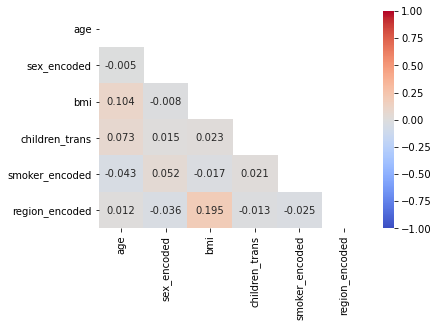

In [126]:
# Generate correlation matrix heat map and drop any variable with high multicollinearity if needed
matrix = np.triu(X_train_original.corr())
sns.heatmap(X_train_original.corr(), annot=True, fmt='.3f', vmin=-1, 
            vmax=1, center= 0, cmap='coolwarm', mask=matrix)

Fit regression and use in the three sets.

In [127]:
lr = LinearRegression().fit(X_train_original,y_train)

y_train_pred = lr.predict(X_train_original)
y_test_pred = lr.predict(X_test_original)
y_val_pred = lr.predict(X_val_original)

print(lr.score(X_train_original, y_train))
print(lr.score(X_test_original,y_test))
print(lr.score(X_val_original, y_val))

0.7741399074597942
0.7638052197617675
0.7966579611069884


In [128]:
print('Coefficients: \n', lr.coef_)
print('Intercept: \n', lr.intercept_)

Coefficients: 
 [ 0.55529788 -0.02307606  0.1182163   0.1112577   0.82148894 -0.05013426]
Intercept: 
 6.282072364000369


In [134]:
# Get detailed results with statsmodels
X_train_original = sm.add_constant(X_train_original)
model = sm.OLS(y_train, X_train_original).fit()
predictions = model.predict(X_train_original) 
 
print_model = model.summary()
print(print_model)

                             OLS Regression Results                            
Dep. Variable:     charges_clean_trans   R-squared:                       0.774
Model:                             OLS   Adj. R-squared:                  0.772
Method:                  Least Squares   F-statistic:                     454.1
Date:                 Fri, 06 Nov 2020   Prob (F-statistic):          6.77e-253
Time:                         18:56:55   Log-Likelihood:                -641.86
No. Observations:                  802   AIC:                             1298.
Df Residuals:                      795   BIC:                             1331.
Df Model:                            6                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              6.2821      0.0

You can try specific variables and interactions using the formula.api from statsmodels. 

In [135]:
import statsmodels.formula.api as smf
# formula: response ~ predictor + predictor
est = smf.ols(formula='charges_clean_trans ~ age + bmi + children_trans + bmi * smoker_encoded + smoker_encoded * age',
              data = df).fit()
print_model = est.summary()
print(print_model)

                             OLS Regression Results                            
Dep. Variable:     charges_clean_trans   R-squared:                       0.826
Model:                             OLS   Adj. R-squared:                  0.825
Method:                  Least Squares   F-statistic:                     1050.
Date:                 Fri, 06 Nov 2020   Prob (F-statistic):               0.00
Time:                         18:57:09   Log-Likelihood:                -908.72
No. Observations:                 1338   AIC:                             1831.
Df Residuals:                     1331   BIC:                             1868.
Df Model:                            6                                         
Covariance Type:             nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              3.8

The model with the original or raw variables seem to perform well (about 77% of explanatory power) in all sets. With the inclusion of interactions, the model increases its power (about 83%), although maybe not enough to justify a more complex model.

### Clean model

Repeat the process as before.

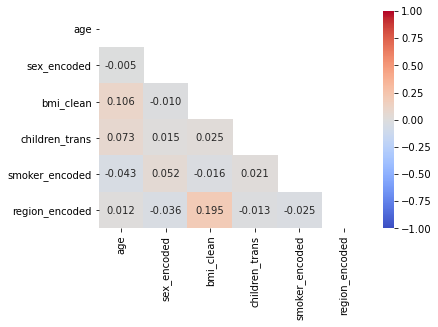

In [138]:
# Generate correlation matrix heat map
matrix = np.triu(X_train_cleaned.corr())
sns.heatmap(X_train_cleaned.corr(), annot=True, fmt='.3f', vmin=-1, 
            vmax=1, center= 0, cmap='coolwarm', mask=matrix)

In [139]:
lr = LinearRegression().fit(X_train_cleaned,y_train)

y_train_pred = lr.predict(X_train_cleaned)
y_test_pred = lr.predict(X_test_cleaned)
y_val_pred = lr.predict(X_val_cleaned)

print(lr.score(X_train_cleaned, y_train))
print(lr.score(X_test_cleaned,y_test))
print(lr.score(X_val_cleaned, y_val))

0.7744994876886014
0.7631123050567639
0.796893063164192


### Complex model

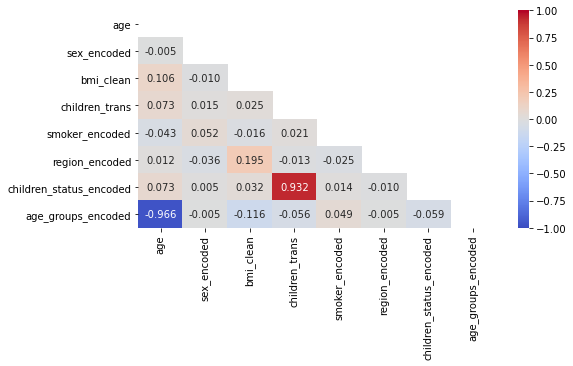

In [140]:
# Generate correlation matrix heat map

fig = plt.figure(figsize=(8,4))

matrix = np.triu(X_train_complex.corr())
sns.heatmap(X_train_complex.corr(), annot=True, fmt='.3f', vmin=-1, 
            vmax=1, center= 0, cmap='coolwarm', mask=matrix)

Drop highly intercorrelated explanatory variables

In [143]:
X_train_complex = X_train_complex.drop(['children_status_encoded', 'age'], axis = 1)
X_val_complex = X_val_complex.drop(['children_status_encoded', 'age'], axis = 1)
X_test_complex = X_test_complex.drop(['children_status_encoded', 'age'], axis = 1)

In [144]:
lr = LinearRegression().fit(X_train_complex,y_train)

y_train_pred = lr.predict(X_train_complex)
y_test_pred = lr.predict(X_test_complex)
y_val_pred = lr.predict(X_val_complex)

print(lr.score(X_train_complex, y_train))
print(lr.score(X_test_complex,y_test))
print(lr.score(X_val_complex, y_val))

0.7526659999372803
0.7517957414395138
0.7811106630459784


### Reduced model

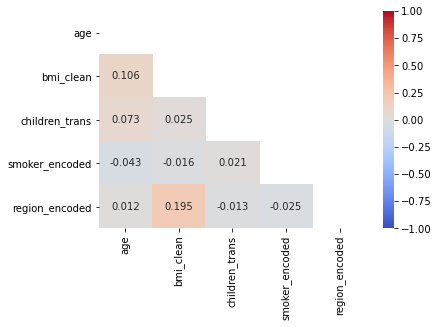

In [148]:
matrix = np.triu(X_train_reduced.corr())
sns.heatmap(X_train_reduced.corr(), annot=True, fmt='.3f', vmin=-1, 
            vmax=1, center= 0, cmap='coolwarm', mask=matrix)

In [149]:
lr = LinearRegression().fit(X_train_reduced,y_train)

y_train_pred = lr.predict(X_train_reduced)
y_test_pred = lr.predict(X_test_reduced)
y_val_pred = lr.predict(X_val_reduced)

print(lr.score(X_train_reduced, y_train))
print(lr.score(X_test_reduced,y_test))
print(lr.score(X_val_reduced, y_val))

0.7740965487343892
0.7628214329768387
0.7939255172049775


In general, the models (original, clean, complex, and reduce) explain a similar amount of variance; therefore, we can opt for the reduced model. Let's check the details of the model with the entire dataset.

In [153]:
import statsmodels.formula.api as smf
# formula: response ~ predictor + predictor
est = smf.ols(formula='charges_clean_trans ~ age + bmi_clean + children_trans + smoker_encoded', data = df).fit()
print_model = est.summary()
print(print_model)

                             OLS Regression Results                            
Dep. Variable:     charges_clean_trans   R-squared:                       0.775
Model:                             OLS   Adj. R-squared:                  0.774
Method:                  Least Squares   F-statistic:                     1145.
Date:                 Fri, 06 Nov 2020   Prob (F-statistic):               0.00
Time:                         19:20:26   Log-Likelihood:                -1080.3
No. Observations:                 1338   AIC:                             2171.
Df Residuals:                     1333   BIC:                             2197.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.6482      0.0

The model explains 77.5% of the variance with only four variable. Smoker status has the highest contribution to the model followed by number of children. 